In [1]:
! pip install konlpy wordcloud

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from konlpy.tag import *
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

In [3]:
# 데이터 로드

ratings_train = pd.read_table('./data/ratings_train.txt')
ratings_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
# 데이터 전처리 - 결측치 제거

ratings_train.isnull().sum()    # document 결측치 5개
ratings_train = ratings_train.dropna(how='any')
ratings_train.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [5]:
# 데이터 전처리 - 불용어 제거

ratings_train['document'] = ratings_train['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ 가-힣]', '')
ratings_train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [6]:
# 데이터 전처리 - 중복값 제거

ratings_train.duplicated().sum()

0

In [8]:
# 데이터 전처리

okt = Okt()
temp_list = []

for sentence in ratings_train['document']:
    sentence_list = okt.pos(sentence)
    for word, tag in sentence_list:
        if tag in ['Noun', "Adjective"]:
            temp_list.append(word)

temp_list

['더빙',
 '진짜',
 '짜증나네요',
 '목소리',
 '흠',
 '포스터',
 '보고',
 '초딩',
 '영화',
 '줄',
 '오버',
 '연기',
 '가볍지',
 '무재',
 '밓었',
 '다그',
 '래서',
 '추천',
 '교도소',
 '이야기',
 '구먼',
 '솔직히',
 '재미',
 '없다',
 '평점',
 '조정',
 '몬페',
 '의',
 '익살스런',
 '연기',
 '영화',
 '스파이더맨',
 '커스틴',
 '던스트',
 '이뻐',
 '막',
 '걸음',
 '마',
 '세',
 '초등학교',
 '학년',
 '생인',
 '영화',
 '반개',
 '아까',
 '움',
 '원작',
 '긴장감',
 '제대로',
 '별',
 '반개',
 '아깝다',
 '욕',
 '이응경',
 '길용우',
 '생활',
 '년',
 '정말',
 '발',
 '해도',
 '그것',
 '납치',
 '감금',
 '반복',
 '반복',
 '드라마',
 '가족',
 '없다',
 '연기',
 '사람',
 '네',
 '액션',
 '없는데도',
 '재미',
 '있는',
 '몇',
 '안되는',
 '영화',
 '왜케',
 '평점',
 '낮은건데',
 '꽤',
 '볼',
 '데',
 '헐리우드',
 '화려함에만',
 '있나',
 '인피니트',
 '짱',
 '진짜',
 '볼때',
 '향수',
 '자극',
 '허진호',
 '감성',
 '절제',
 '멜로',
 '달인',
 '울면',
 '손',
 '횡단보도',
 '때',
 '뻔',
 '이범수',
 '연기',
 '드럽게',
 '담백하고',
 '깔끔해서',
 '좋다',
 '로만',
 '자꾸',
 '그',
 '사람',
 '것',
 '취향',
 '존중',
 '다지',
 '진짜',
 '내생',
 '극장',
 '영화',
 '가장',
 '노잼',
 '노',
 '감동',
 '임',
 '스토리',
 '어거지',
 '감동',
 '어거지',
 '냥',
 '매번',
 '긴장',
 '재밋음',
 '사람',
 '바스코',
 '이기',
 '락스',
 '코',
 '바

In [9]:
word_count = Counter(temp_list)
word_count

Counter({'영화': 50737,
         '정말': 9645,
         '진짜': 8343,
         '이': 8001,
         '점': 7930,
         '연기': 6434,
         '평점': 6324,
         '것': 6315,
         '최고': 6035,
         '스토리': 5344,
         '생각': 5314,
         '왜': 5157,
         '드라마': 5063,
         '감동': 4879,
         '사람': 4836,
         '보고': 4612,
         '말': 4565,
         '더': 4367,
         '때': 4314,
         '내': 4306,
         '배우': 4297,
         '거': 4139,
         '감독': 4126,
         '재미': 3930,
         '내용': 3899,
         '그냥': 3838,
         '뭐': 3813,
         '그': 3698,
         '좀': 3665,
         '이런': 3602,
         '쓰레기': 3542,
         '없는': 3492,
         '시간': 3446,
         '수': 3253,
         '나': 3060,
         '작품': 2964,
         '사랑': 2943,
         '없다': 2868,
         '다시': 2838,
         '하나': 2838,
         '볼': 2790,
         '마지막': 2755,
         '이건': 2688,
         '좋은': 2663,
         '입니다': 2555,
         '같은': 2549,
         '완전': 2542,
         '정도': 2523,
 

In [10]:
common_words = word_count.most_common(50)
common_words

[('영화', 50737),
 ('정말', 9645),
 ('진짜', 8343),
 ('이', 8001),
 ('점', 7930),
 ('연기', 6434),
 ('평점', 6324),
 ('것', 6315),
 ('최고', 6035),
 ('스토리', 5344),
 ('생각', 5314),
 ('왜', 5157),
 ('드라마', 5063),
 ('감동', 4879),
 ('사람', 4836),
 ('보고', 4612),
 ('말', 4565),
 ('더', 4367),
 ('때', 4314),
 ('내', 4306),
 ('배우', 4297),
 ('거', 4139),
 ('감독', 4126),
 ('재미', 3930),
 ('내용', 3899),
 ('그냥', 3838),
 ('뭐', 3813),
 ('그', 3698),
 ('좀', 3665),
 ('이런', 3602),
 ('쓰레기', 3542),
 ('없는', 3492),
 ('시간', 3446),
 ('수', 3253),
 ('나', 3060),
 ('작품', 2964),
 ('사랑', 2943),
 ('없다', 2868),
 ('다시', 2838),
 ('하나', 2838),
 ('볼', 2790),
 ('마지막', 2755),
 ('이건', 2688),
 ('좋은', 2663),
 ('입니다', 2555),
 ('같은', 2549),
 ('완전', 2542),
 ('정도', 2523),
 ('있는', 2511),
 ('처음', 2452)]

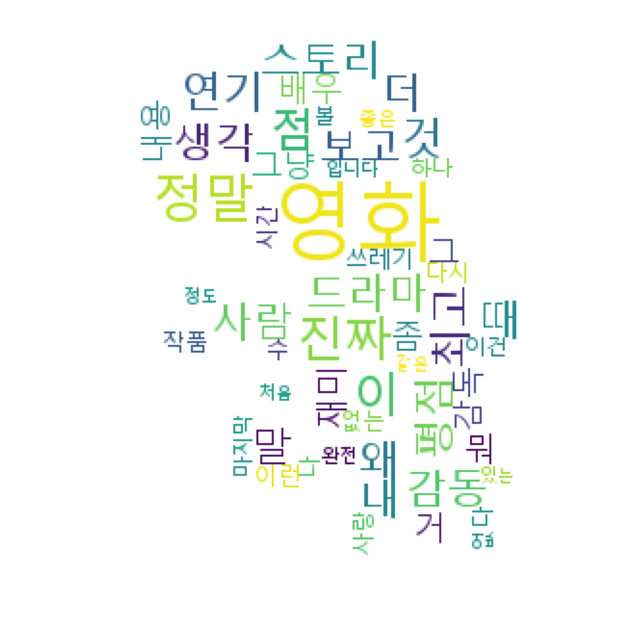

In [17]:
common_words_dict = dict(common_words)

font_path = "./data/fonts/MALGUN.TTF"
mask_arr = np.array(Image.open('./data/agumon.jpg'))

wc = WordCloud(width=1000, height=1000, background_color='white', font_path=font_path, mask=mask_arr)
plt.figure(figsize=(10, 8))
plt.imshow(wc.generate_from_frequencies(common_words_dict))
plt.axis('off')
plt.show()

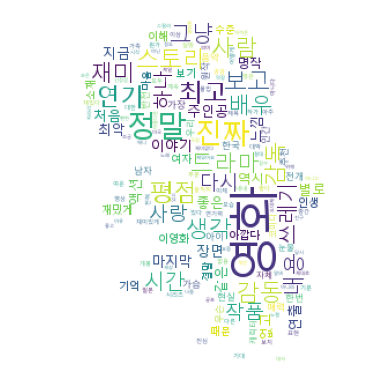

In [29]:
result_dict = dict()
stopwords = ['으로', '하다', '되다', '한테', '에게', '에서', '부터', '까지', 
             '으로서', '으로써', '입니다', '이런', '없다', '없는', '있는', '같다', '완전', '이건', '정도']

for word, num in word_count.items():
    if(word not in stopwords and (len(word) > 1 and num > 1)):
        result_dict[word] = num

wc = WordCloud(width=1000, height=1000, mask=mask_arr, font_path=font_path, background_color='white')
plt.imshow(wc.generate_from_frequencies(result_dict))
plt.axis('off')
plt.savefig('./data/wc5.png')
plt.show()